# EECS4404 Project 2

Jimmy Le<br>
216143992<br>
Prof. Archit Garg<br>
EECS4404 SU 2022

## References

Code Process and Method: EECS4404 Class Notes & Jupyter Examples<br>

To Demonstrate full understanding of the code, full documentation and explaination of the code will be provided

#### We start by performing EDA on the dataset

First explore the features of the dataset. By inspection of the .csv file, we can see that 'Region' and 'Channel' appear to be categorical and all of theo ther features appear to be continous. But let's take a look it more thoroughly to verify.

In [90]:
#Import libraries to be used to analyze dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#Read in dataset
wholesale = pd.read_csv('Wholesale customers data.csv')
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [91]:
#Check the number of rows and columns in the wholesale dataset
wholesale.shape

(440, 8)

In [92]:
#We also check the datatypes stored in each column
wholesale.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [93]:
#See the distribution of variable Region
wholesale['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [94]:
#See distribution of target variable Channel
wholesale['Channel'].value_counts()
#Note that our target variable from the output is BINARY!

1    298
2    142
Name: Channel, dtype: int64

In [95]:
# We can additionally verify which variables are categorical and continous with the following
for col in wholesale.columns:
    print('{}: {} unique values'.format(col, wholesale[col].nunique()))

Channel: 2 unique values
Region: 3 unique values
Fresh: 433 unique values
Milk: 421 unique values
Grocery: 430 unique values
Frozen: 426 unique values
Detergents_Paper: 417 unique values
Delicassen: 403 unique values


Reiterating what we mentioned earlier, we can make a distinction between our categorical and continous variables. We verify channel and region appear to be categorical variables above (as numerical indicator values), as they can be either one of 2  or 3 distnct values respectively. The other features, 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', and 'Delicassen' all appear to be continous as they are varied integer values.

We can also see by inspection of the region values that there is an imbalance in the region class. We can analyze this more later

## Explore Continous Features

In [96]:
from scipy import stats

#Drop cateogorical feature region to analyze continous features
#Note: We do not drop our target variable Channel, although it is categorical as well
cat_feat = ['Region']
wholesale.drop(cat_feat, axis=1, inplace=True)
wholesale.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [97]:
#We can observe the general distrubution of these features
wholesale.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [98]:
#We can observe a few things:

#Observation: There appears no null values in any rows, so fortunately no need to have to account for any null values throughout our process
#Observation: There appears to be a large max value of spending on 'Fresh'. This appears to be bloating the mean and the std. Will have to inspect further
#Observation: Clients appear to be spending the least on Detergents and Delicassen, and most on Fresh products

#WILL HAVE TO APPEND MORE TO THIS

In [99]:
#Correlation matrix may give us some hints as to the correlation of these variables
wholesale.corr()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Fresh,-0.169172,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Observation: We observe see looking at the matrix that Grocery and Detergents_Paper have the strongest correlation to Channel, our target variable, around 0.6 correlation, which clues us in that they are likely the strongest factors which may be useful in predicting the Channel for our Wholesale model. Additionally, Milk appears to be somewhat corelated (0.46) while the others appear to be weakly correlated (+-0.2 correlation or less)

In [100]:
#We can use groupby to get a better idea of how the continous variables relate to target variable, we can inspect the means in relation to the Channel
wholesale.groupby('Channel').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,
1,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


In [101]:
#From initial observations, it appears that:
#    Channel 2 appears to have higher spending in Milk, Grocery, and Detergents_Paper
#    Channel 1 appears to have slightly more spending in Fresh, and Frozen
#       However, the averages of 'Fresh' may appear closer than expected due to outlier value of 112151 spent in fresh (which was a member of channel 1)

## OMIT THIS SECTION MAYBE?

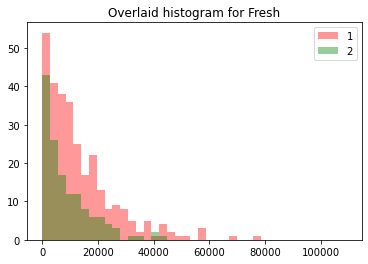

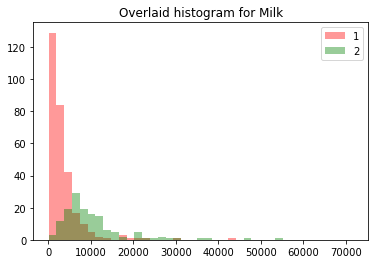

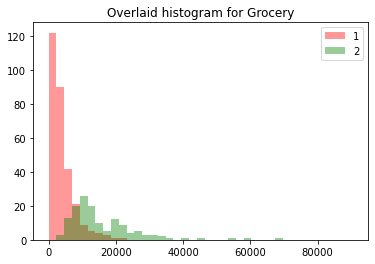

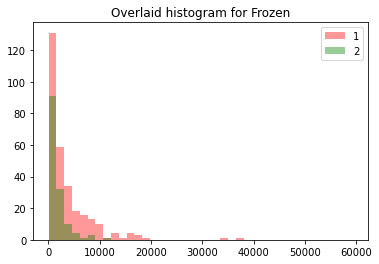

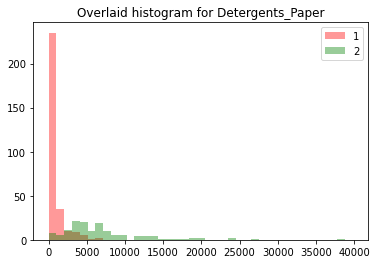

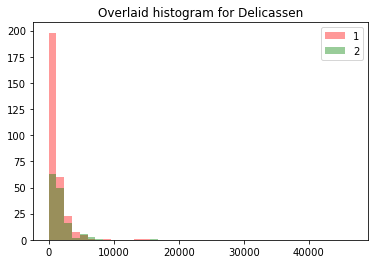

In [102]:
#We can get a visual representation below
for i in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']: #For every feature
    c1 = list(wholesale[wholesale['Channel'] == 1][i].dropna()) #Drop null references
    c2 = list(wholesale[wholesale['Channel'] == 2][i].dropna())
    xmin = min(min(c1), min(c2)) #Dimensions of the plot
    xmax = max(max(c1), max(c2))
    width = (xmax - xmin) / 40
    #Draw the plots, arranging adelie as red, gentoo as green, chinstrap as blue
    sns.distplot(c1, color='r', kde=False, bins=np.arange(xmin, xmax, width)) 
    sns.distplot(c2, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['1', '2']) #Legends for plot
    plt.title('Overlaid histogram for {}'.format(i)) #Title
    plt.show()

In [103]:
#Observation: Channel 1 appears to have many people who only spend small amounts in each category
#    There are only a select few customers in each category who spend large amounts
#    Clients in channel 1 appear more likely to spend less
#    Clients in channel 1 appear more likely to spend more in Fresh 
#Observation: Customers in Clients of 2 have more spread out spending patterns, some more likely to spend more compared to their Channel 1 counterparts
#    In particular, clients in channel 2 are more likely to spend in Detergents_Paper, Grocery, Milk
#    Clients of channel 2 appear more likely to spend more

## END OMIT

## Explore Categorical Features

In [104]:
#Drop all continous features
#I.e., drop all features but 'Region' and 'Channel'
wholesale = pd.read_csv('Wholesale customers data.csv')
cont_feat = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
wholesale.drop(cont_feat, axis=1, inplace=True)
wholesale.head()

,Channel,Region
0,2,3
1,2,3
2,2,3
3,1,3
4,2,3


In [105]:
# Check if there are any missing values
wholesale.isnull().sum()

Channel    0
Region     0
dtype: int64

In [106]:
#We can observe here there are also no null values, so we do not need to worry about having to treat any values
#Additionally recall, from earlier, Region can be one of three values, (1,2,3)
#We can check the relationship with target with groupby
wholesale.groupby('Channel').mean()

,Region
Channel,
1,2.510067
2,2.612676


<Figure size 432x288 with 0 Axes>

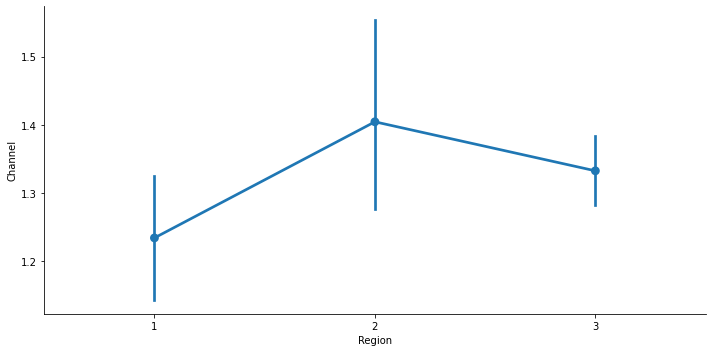

In [107]:
#From earlier, we also observed that the most of the Region values are 3
#There appears to be no clear disinction if a channel favours a specific region from this
#Plot categorical features to find any pattern
# Plot categorical features
for i, col in enumerate(['Region']):
    plt.figure(i)
    sns.catplot(x=col, y='Channel', data=wholesale, kind='point', aspect=2, )

In [108]:
# Once again, region appears to have no significant impact on determining the channel

# Exploratory Data Analysis Conclusions

* Grocery and Detergents_Paper features are the strongest correlated features to target variable 'Channel', with a correlation of ~0.6
* Clients in channel 1 are more likely to spend less, with a select few in channel 1 spending more
* Clients in channel 2 have more spread out spending patterns, where clients in channel 2 more often spend more than their channel 1 counterparts
* Channel 2 typically has higher spending in Milk, Grocery, and Detergents_Paper
* Clients in channel 1 appear more likely to spend more in Fresh
* Region appears to have no impact on the Channel

# Clean data

We read in our data again and begin clean using the lessons we learned from our exploratory data analysis

## Cap and Floor data to remove outliers

We remove outliers in our data so that it does not chase outliers and focuses on the actual trends of our data

In [109]:
wholesale = pd.read_csv('Wholesale customers data.csv')
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [110]:
# #We can check where outliers may be an issue in .describe()
# wholesale.describe()

From the above, by inspection we can see that the max values for Fresh, Milk, and Grocery seem extreme. Additionally, the max spending for all features are much different than their means and standard deviations. Let's throughly analyze these to be sure these are outliers

In [111]:
# def detect_outlier(feature):
#     outliers = []
#     data = wholesale[feature]
#     mean = np.mean(data)
#     std =np.std(data)
    
    
#     for y in data:
#         z_score= (y - mean)/std 
#         if np.abs(z_score) > 3:
#             outliers.append(y)
#     print('\nOutlier caps for {}:'.format(feature))
#     print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
#                                                              len([i for i in data
#                                                                   if i > data.quantile(.95)])))
#     print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
#     print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
#                                                            len([i for i in data
#                                                                 if i > data.quantile(.99)])))

# # Determine what the upperbound should be for our continuous features
# for feat in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
#     detect_outlier(feat)

Out of 440 total data points, there are not too many extreme outliers. Additionally, the 95th percentile capped values given seem fairly reasonable given:
* the shape of the data from the histogram we have completed above  
* the 25th to 75th percentile from the describe table 

As they do not deviating to the extremes from the ranges of values presented from those. We cap all continous features at the 95th percentile

In [112]:
#Capping features
wholesale['Fresh_clean'] = wholesale['Fresh']#.clip(upper=wholesale['Fresh'].quantile(.95))
wholesale['Milk_clean'] = wholesale['Milk']#.clip(upper=wholesale['Milk'].quantile(.95))
wholesale['Grocery_clean'] = wholesale['Grocery']#.clip(upper=wholesale['Grocery'].quantile(.95))
wholesale['Frozen_clean'] = wholesale['Frozen']#.clip(upper=wholesale['Frozen'].quantile(.95))
wholesale['Detergents_Paper_clean'] = wholesale['Detergents_Paper']#.clip(upper=wholesale['Detergents_Paper'].quantile(.95))
wholesale['Delicassen_clean'] = wholesale['Delicassen']#.clip(upper=wholesale['Delicassen'].quantile(.95))

#Verify capping was successful by describing the data
wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_clean,Milk_clean,Grocery_clean,Frozen_clean,Detergents_Paper_clean,Delicassen_clean
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Transform Skewed Features

From inspection of our above histograms, there are long tails in our data, which can be problematic because our models will likely go chasing the tail instead of focusing on where the bulk of the data is.

In [113]:
# # Read in data

# import matplotlib.pyplot as plt
# import scipy.stats
# from statsmodels.graphics.gofplots import qqplot
# from scipy.stats import boxcox
# import seaborn as sns
# %matplotlib inline

# wholesale.head()

In [114]:
# # Plot histogram for each continuous feature to see if a transformation is necessary
# # we need to see if either features are even skewed
# for feature in ['Fresh_clean', 'Milk_clean', 'Grocery_clean', 'Frozen_clean', 'Detergents_Paper_clean', 'Delicassen_clean']:
#     sns.distplot(wholesale[feature], kde=False)
#     plt.title('Histogram for {}'.format(feature))
#     plt.show()

Boxcox documentation provided by: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

In [115]:
# #Apply boxcox transformation from the scipy library
# for i in wholesale.columns[8:]:
#     #Add generic variables maxlog and ci as boxcox returns 3 args
#     #See above for documentation
#     wholesale[i], maxlog, ci=boxcox(wholesale[i]+0.0000001, alpha=0.05)
                                                                

# wholesale.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
# plt.show()
# # for feature in ['Fresh_clean', 'Milk_clean', 'Grocery_clean', 'Frozen_clean', 'Detergents_Paper_clean', 'Delicassen_clean']:
# #     sns.distplot(wholesale[feature], kde=False)
# #     plt.title('Histogram for {}'.format(feature))
# #     plt.show()

# Export Cleaned data

In [116]:
#Note: We drop region from this data as it does not contribute to finding the channel
cleaned_features = ['Channel', 'Fresh_clean', 'Milk_clean', 'Grocery_clean', 'Frozen_clean', 'Detergents_Paper_clean', 'Delicassen_clean']
wholesale[cleaned_features].to_csv('wholesale_cleaned.csv', index=False)

# Implement Feature Scaling

In [117]:
# Some libraries tend to be in flux for their dependency versions
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

wholesale = pd.read_csv('wholesale_cleaned.csv')
wholesale.head()


,Channel,Fresh_clean,Milk_clean,Grocery_clean,Frozen_clean,Detergents_Paper_clean,Delicassen_clean
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [118]:
pd.DataFrame(wholesale).describe()

,Channel,Fresh_clean,Milk_clean,Grocery_clean,Frozen_clean,Detergents_Paper_clean,Delicassen_clean
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:ylabel='Density'>

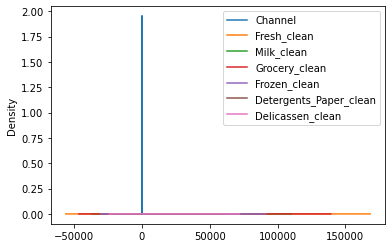

In [119]:
pd.DataFrame(wholesale).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

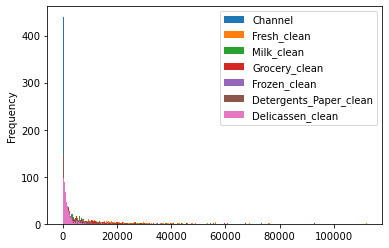

In [120]:
pd.DataFrame(wholesale).plot(kind='hist', bins=300)

In [121]:
#Start with standard scaler
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(wholesale)
scaled1[:5]

array([[ 1.44865163,  0.05293319,  0.52356777, -0.04111489, -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163, -0.39130197,  0.54445767,  0.17031835, -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163, -0.44702926,  0.40853771, -0.0281571 , -0.13753572,
         0.13323164,  2.24329255],
       [-0.69029709,  0.10011141, -0.62401993, -0.3929769 ,  0.6871443 ,
        -0.49858822,  0.09341105],
       [ 1.44865163,  0.84023948, -0.05239645, -0.07935618,  0.17385884,
        -0.23191782,  1.29934689]])

In [122]:
pd.DataFrame(scaled1).describe()

,0,1,2,3,4,5,6
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


<AxesSubplot:ylabel='Density'>

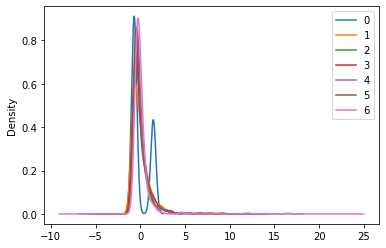

In [123]:
pd.DataFrame(scaled1).plot(kind='kde')


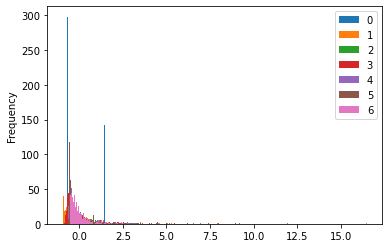

In [124]:
pd.DataFrame(scaled1).plot(kind='hist', bins=300);

### MinMaxScaler

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaled3 = MinMaxScaler().fit_transform(wholesale)
#scaled3 = pd.DataFrame(scaled3, wholesale.columns)

scaled3[:5]

array([[1.        , 0.11294004, 0.13072723, 0.08146416, 0.0031063 ,
        0.0654272 , 0.02784731],
       [1.        , 0.06289903, 0.13282409, 0.10309667, 0.02854842,
        0.08058985, 0.03698373],
       [1.        , 0.05662161, 0.11918086, 0.08278992, 0.03911643,
        0.08605232, 0.16355861],
       [0.        , 0.11825445, 0.01553586, 0.04546385, 0.10484189,
        0.01234568, 0.03723404],
       [1.        , 0.20162642, 0.07291369, 0.07755155, 0.063934  ,
        0.04345483, 0.10809345]])

In [126]:
pd.DataFrame(scaled3).describe()

,0,1,2,3,4,5,6
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


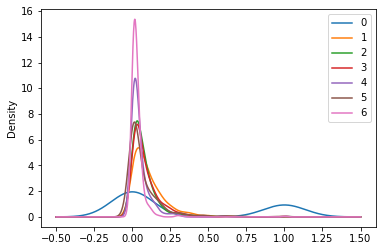

In [127]:
pd.DataFrame(scaled3).plot(kind='kde');

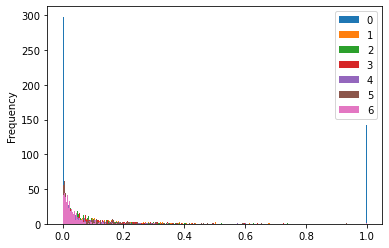

In [128]:
pd.DataFrame(scaled3).plot(kind='hist', bins=300);